# Team DatenWelle

## Exploratory data analysis

This notebook loads the data from JSON format and performs some initial clean-up and visualisation tasks

In [54]:
import json
import pandas as pd
!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
!pip3 install spacy
import spacy


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.5 MB 25.7 MB/s eta 0:00:01
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
     |████████████████████████████████| 48 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 181 kB 42.4 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 912 kB 35.6 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 5.2 MB/s  eta 0:00:01
     |████████████████████████████████| 3.1 MB 63.1 MB/s eta 0:00:01
     |████████████████████████████████| 490 kB 47.6 MB/s eta 0:00:01
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
     |████████████████████████████████| 10.2 MB 62.2 MB/s eta 0:00:01
  Using cached MarkupSafe-2.1.2-cp37-cp37m-manylinux_2_17_x86_64.m

In [3]:
# Opening JSON file
f = open('/home/marios/data/dw-project-data/cms-df_slice-recent-data.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame.from_dict(data)

print(df.head())

              id                                               name  \
150000  45197790  Man falls into black hole art exhibit in Portugal   
150001  45200528  Angela Merkel stresses importance of press fre...   
150002  45191500  Paris knife attack: 2 killed, 1 seriously injured   
150003  45194757  Italy lets children disembark from Diciotti re...   
150004  45198372  US security adviser John Bolton presses Russia...   

                                              shortTitle  \
150000             Man falls into black hole art exhibit   
150001  Merkel supports reporters in PEGIDA rally debate   
150002             2 killed in Paris suburb knife attack   
150003     Italy lets children off rescue ship in Sicily   
150004      Russia pressed by US about election meddling   

                                                     text  \
150000  <p>A visitor to a museum in Portugal was injur...   
150001  <p>German Chancellor Angela Merkel stressed <a...   
150002  <p>Two people were&nb

In [5]:
#general info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25659 entries, 150000 to 175658
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     25659 non-null  int64 
 1   name                   25659 non-null  object
 2   shortTitle             25659 non-null  object
 3   text                   25659 non-null  object
 4   teaser                 25659 non-null  object
 5   shortTeaser            25659 non-null  object
 6   kicker                 23473 non-null  object
 7   regions                25659 non-null  object
 8   keywords               25659 non-null  object
 9   keywordStrings         25659 non-null  object
 10  thematicFocusCategory  25374 non-null  object
 11  navigations            25659 non-null  object
 12  categories             25659 non-null  object
 13  departments            25659 non-null  object
 14  firstPublicationDate   25294 non-null  object
 15  lastModifiedDate  

## Exploring Focus Categories column

In [6]:

#df['thematicFocusCategory'].astype(str).unique()
#Exporting dictionary into the array of 'clean' focus categories
focus_clean = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)
focus_clean.unique()

array(['Arts', 'Media', 'Crime', 'Politics', 'Law and Justice', 'Sports',
       'Society', 'Catastrophe', 'Human Rights',
       'Cars and Transportation', 'Nature and Environment', 'Business',
       'Religion', 'Conflicts', 'Health', 'Film', 'Music', 'Culture',
       'Science', 'Travel', 'Education', 'Lifestyle', 'History', None,
       'Literature', 'Technology', 'Trade', 'Offbeat', 'Migration',
       'Press Freedom', 'Soccer', 'Digital World', 'Equality',
       'Rule of Law', 'Climate', 'Terrorism', 'Corruption',
       'Freedom of Speech', 'Diversity', 'Learning German', 'Innovation',
       'Architecture', 'Globalization', 'Theater', 'Dance',
       'Food Security'], dtype=object)

In [19]:
# Amount of articles per FocusCategory
focus_clean[5]

'Law and Justice'

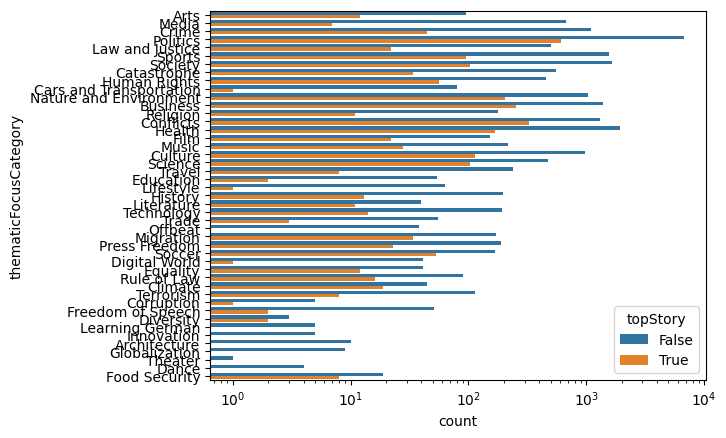

In [8]:
#Plotting amount of TopStories across FocusCategories
sns.countplot(y=focus_clean, hue='topStory' ,data=df);
plt.xscale('log')

In [9]:
#let's take a look at thee keywords 


## EXPLORE KEYWORDS

In [25]:
df['keywords'][0]

[{'name': 'Portugal'},
 {'name': 'Porto'},
 {'name': 'Anish Kapoor'},
 {'name': '"Descent into Limbo"'},
 {'name': 'art'},
 {'name': 'sculpture'},
 {'name': 'Serralves Museum'}]

In [42]:
df['clean_kw'] = df['keywords']

for i in range(len(df['clean_kw'])):
    df['clean_kw'][i] = [list(kw.values())[0] for kw in df['clean_kw'][i]]

/home/marios/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
df['clean_kw']

150000    [Portugal, Porto, Anish Kapoor, "Descent into ...
150001    [Germany, Dresden, PEGIDA, Angela Merkel, ZDF,...
150002                        [Paris, knife attack, France]
150003    [migrants, asylum seekers, Matteo Salvini, Giu...
150004    [USA, Russia, United Nations, John Bolton, Nik...
                                ...                        
175654    [Turkey, Recep Tayipp Erdogan, Finland Sweden,...
175655     [pollution, gold mine, Turkey, Anagold, cyanide]
175656    [war, Ukraine, Russia, Russian attack, soldier...
175657                 [France, vegetarian, steak, sausage]
175658                                  [Ecuador, protests]
Name: clean_kw, Length: 25659, dtype: object

In [52]:
#let's see what keywords we can geet from the first article just using the teext
text = df.text[0]

In [59]:
#!python3 -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)


In [60]:
print(doc.ents)

(Portugal, last week, Anish Kapoor</a, Kapoor, 1992, Limbo, by&nbsp;Kapoor&nbsp;in, the Serralves Museum, Limbo, 2.5-meter, 8-foot, 60-year-old, Italian, Portuguese, Publico, first, Kapoor, 56.25%, 0, max-height, Imago/Zumapress/R. Franca</small></figcaption></figure, 2006, Cloud Gate, The Bean, US, 2016, Kapoor, Vantablack, British, Vantablack, Vantablack, Limbo, 0, 20"><g, 7.599H13.5l.002 4.706h.601l4.582 3.25-.005-, 1.509-.799-.004-9.516z"></path></g></svg, leaves</h2><video, sd_avc,.mp4.csmil, JavaScript, HTML5)
